In [1]:
%load_ext autoreload
%autoreload complete

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib_inline.backend_inline import set_matplotlib_formats
from tqdm.notebook import tqdm

set_matplotlib_formats("svg")

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

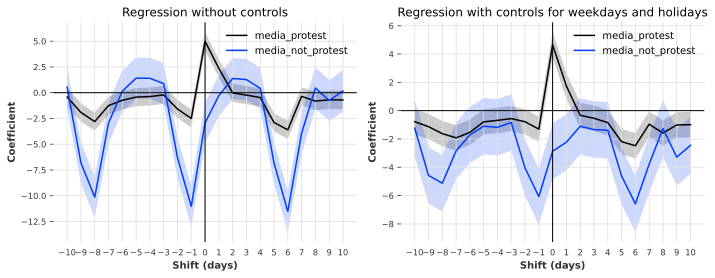

In [37]:
import matplotlib.pyplot as plt

from src.features.time_series.lagged_impact import plot_lagged_impact
from src.models.regression import regression

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
results = regression(include_controls=False)
plot_lagged_impact(results, "occ_FFF", "protest", ax=axes[0])
axes[0].set_title("Regression without controls")

results = regression(max_lags=0)
plot_lagged_impact(results, "occ_FFF", "protest", ax=axes[1])
axes[1].set_title("Regression with controls for weekdays and holidays")
fig.tight_layout()
plt.show()

  0%|          | 0/16 [00:00<?, ?it/s]

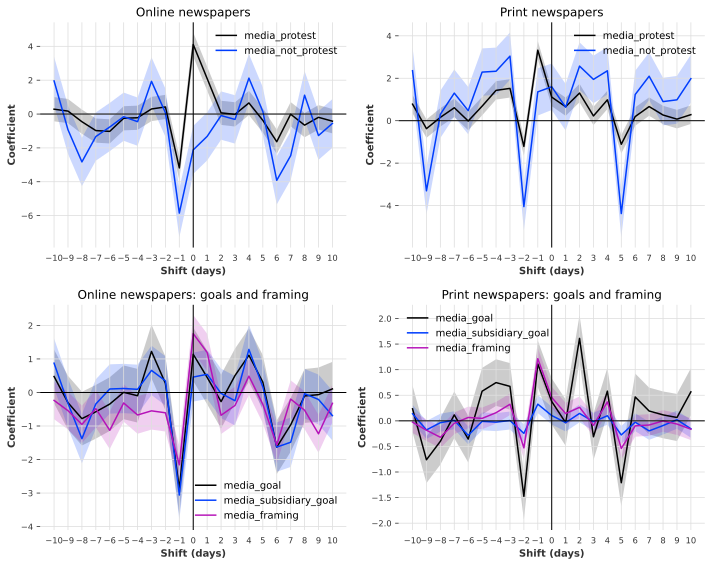

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
results = regression(max_lags=1)
plot_lagged_impact(results, "occ_FFF", "protest", ax=axes[0, 0])
axes[0, 0].set_title("Online newspapers")

results = regression(max_lags=1, media_source="dereko")
plot_lagged_impact(results, "occ_FFF", "protest", ax=axes[0, 1])
axes[0, 1].set_title("Print newspapers")

results = regression(max_lags=1)
plot_lagged_impact(results, "occ_FFF", "goals", ax=axes[1, 0])
axes[1, 0].set_title("Online newspapers: goals and framing")

results = regression(max_lags=1, media_source="dereko")
plot_lagged_impact(results, "occ_FFF", "goals", ax=axes[1, 1])
axes[1, 1].set_title("Print newspapers: goals and framing")
fig.tight_layout()
plt.show()

In [42]:
results[
    (results["target"] == "media_protest")
    & (results["lag"] == 0)
    & (results["shift"] == 0)
].sort_values("coef", key=abs, ascending=False)

,coef,predictor,lag,target,ci_lower,ci_upper,shift
2446,6.165390,SERIES8,0,media_protest,5.836089,6.494691,0
2434,4.524181,SERIES1,0,media_protest,4.228123,4.820238,0
2443,3.792164,SERIES5,0,media_protest,3.531228,4.053101,0
2427,3.688348,weekday_Saturday,0,media_protest,3.495623,3.881073,0
2432,-3.357768,is_holiday,0,media_protest,-3.751302,-2.964233,0
2433,3.186337,SERIES0,0,media_protest,2.907623,3.465052,0
2426,1.845623,weekday_Monday,0,media_protest,1.759156,1.932090,0
2435,-1.460580,SERIES10,0,media_protest,-1.711465,-1.209695,0
2430,1.260050,weekday_Tuesday,0,media_protest,1.166758,1.353342,0
2431,1.213615,weekday_Wednesday,0,media_protest,1.118207,1.309024,0
